--- Step 1: Data Loading & Missing Value Check ---


Saving depression_data.csv to depression_data.csv
Dataset loaded successfully.

Dataset shape: (413768, 16)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                4137

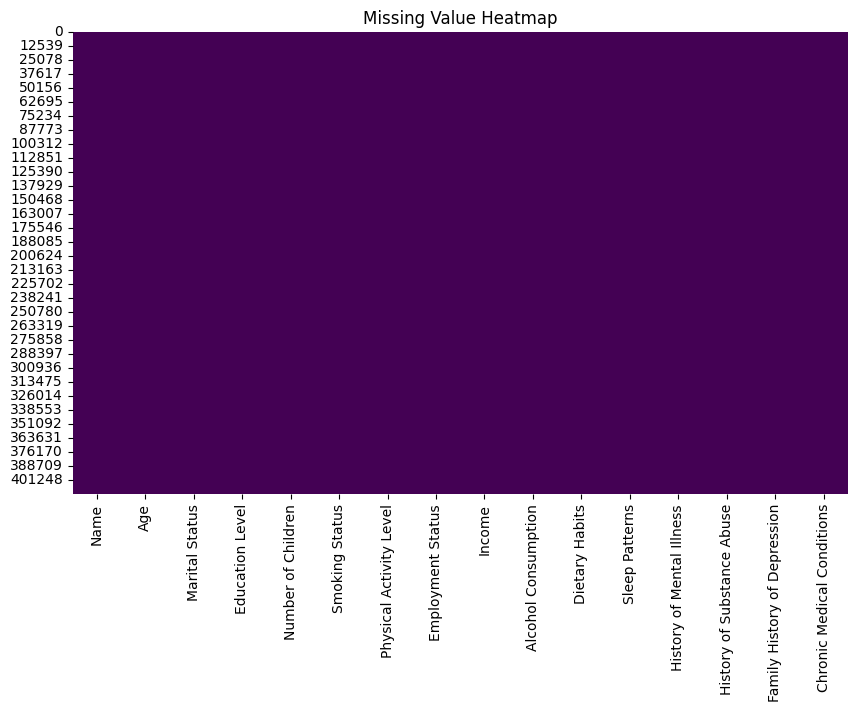

--------------------------------------------------


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# -----------------------------------------------------------
# Part 1: Data Loading & Missing Value Check
# -----------------------------------------------------------
print("--- Step 1: Data Loading & Missing Value Check ---")
uploaded = files.upload()
df = pd.read_csv('depression_data.csv')
print("Dataset loaded successfully.")

# Checking dataset shape and contents
print("\nDataset shape:", df.shape)
print("\nDataset information:")
print(df.info())

# Missing value check
print("\nMissing values per column:")
print(df.isnull().sum())

# Visualization of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()
print("-" * 50)


--- Step 2: Outlier Removal using IQR Method ---
Original number of rows: 413768

Working on Age...
Found 0 outliers in Age


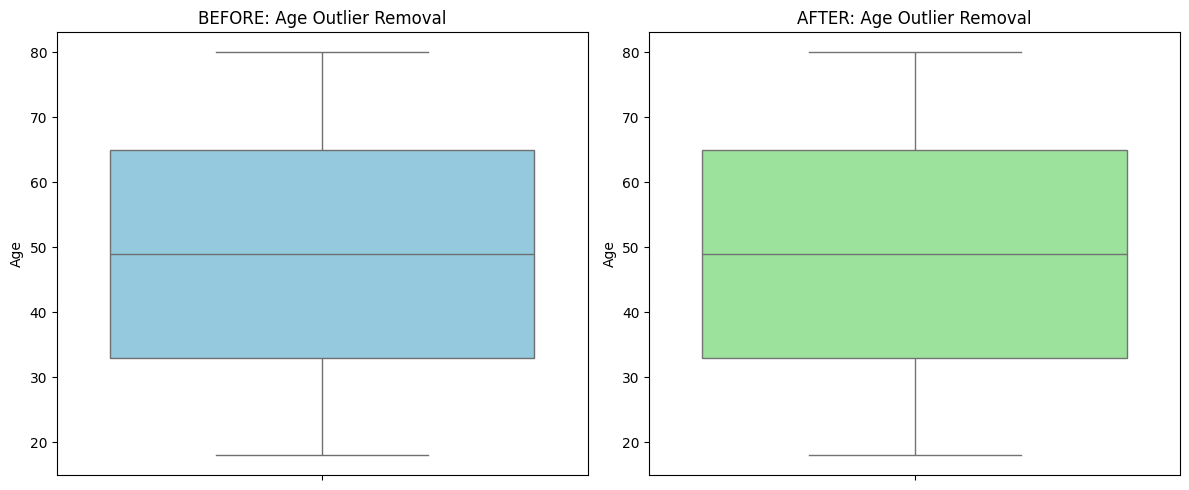

Rows remaining after removing Age outliers: 413768

Working on Number of Children...
Found 0 outliers in Number of Children


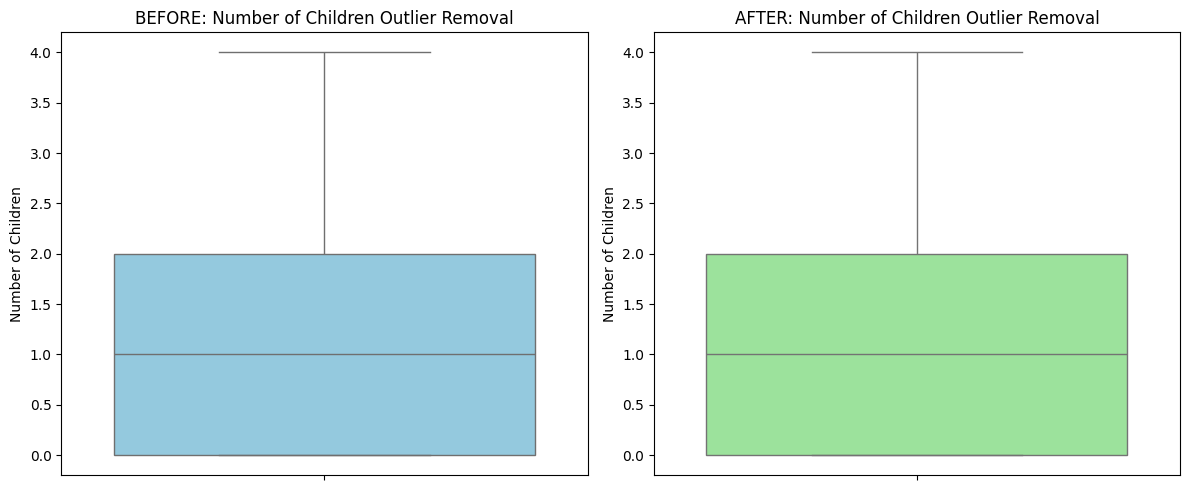

Rows remaining after removing Number of Children outliers: 413768

Working on Income...
Found 5157 outliers in Income


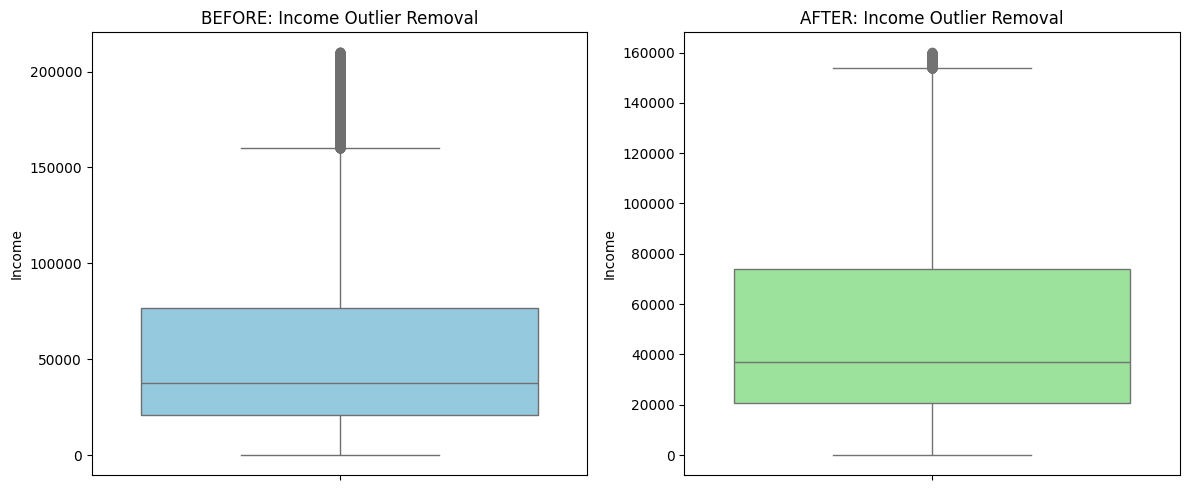

Rows remaining after removing Income outliers: 408611

Final number of rows after outlier removal: 408611
--------------------------------------------------


In [ ]:
# -----------------------------------------------------------
# Part 2: Outlier Removal
# -----------------------------------------------------------
print("\n--- Step 2: Outlier Removal using IQR Method ---")

original_rows = len(df)
print("Original number of rows:", original_rows)

# Numeric columns
numeric_cols = ['Age', 'Number of Children', 'Income']
data_after_outlier_removal = df.copy()

for col in numeric_cols:
    print(f"\nWorking on {col}...")

    # Visualization
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=data_after_outlier_removal[col], color='skyblue')
    plt.title(f"BEFORE: {col} Outlier Removal")

    # Finding outliers
    Q1 = data_after_outlier_removal[col].quantile(0.25)
    Q3 = data_after_outlier_removal[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers_count = len(data_after_outlier_removal[(data_after_outlier_removal[col] < lower_limit) | (data_after_outlier_removal[col] > upper_limit)])
    print(f"Found {outliers_count} outliers in {col}")

    data_after_outlier_removal = data_after_outlier_removal[(data_after_outlier_removal[col] >= lower_limit) & (data_after_outlier_removal[col] <= upper_limit)]

    # Visualization
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data_after_outlier_removal[col], color='lightgreen')
    plt.title(f"AFTER: {col} Outlier Removal")

    plt.tight_layout()
    plt.show()

    print(f"Rows remaining after removing {col} outliers: {len(data_after_outlier_removal)}")

df_clean = data_after_outlier_removal
print(f"\nFinal number of rows after outlier removal: {len(df_clean)}")
print("-" * 50)


--- Step 3: Feature Encoding & Correlation Analysis ---

Encoded Dataset Shape: (408611, 16)

First 5 rows of encoded dataset:
    Age  Number of Children     Income  Education Level  Sleep Patterns  \
0  31.0                 2.0   26265.67              2.0             1.0   
1  55.0                 1.0   42710.36              0.0             1.0   
2  78.0                 1.0  125332.79              3.0             2.0   
3  58.0                 3.0    9992.78              3.0             0.0   
4  18.0                 0.0    8595.08              0.0             1.0   

   Physical Activity Level  Alcohol Consumption  Dietary Habits  \
0                      2.0                  1.0             1.0   
1                      0.0                  2.0             0.0   
2                      0.0                  0.0             0.0   
3                      1.0                  1.0             1.0   
4                      0.0                  0.0             1.0   

   Marital Status 

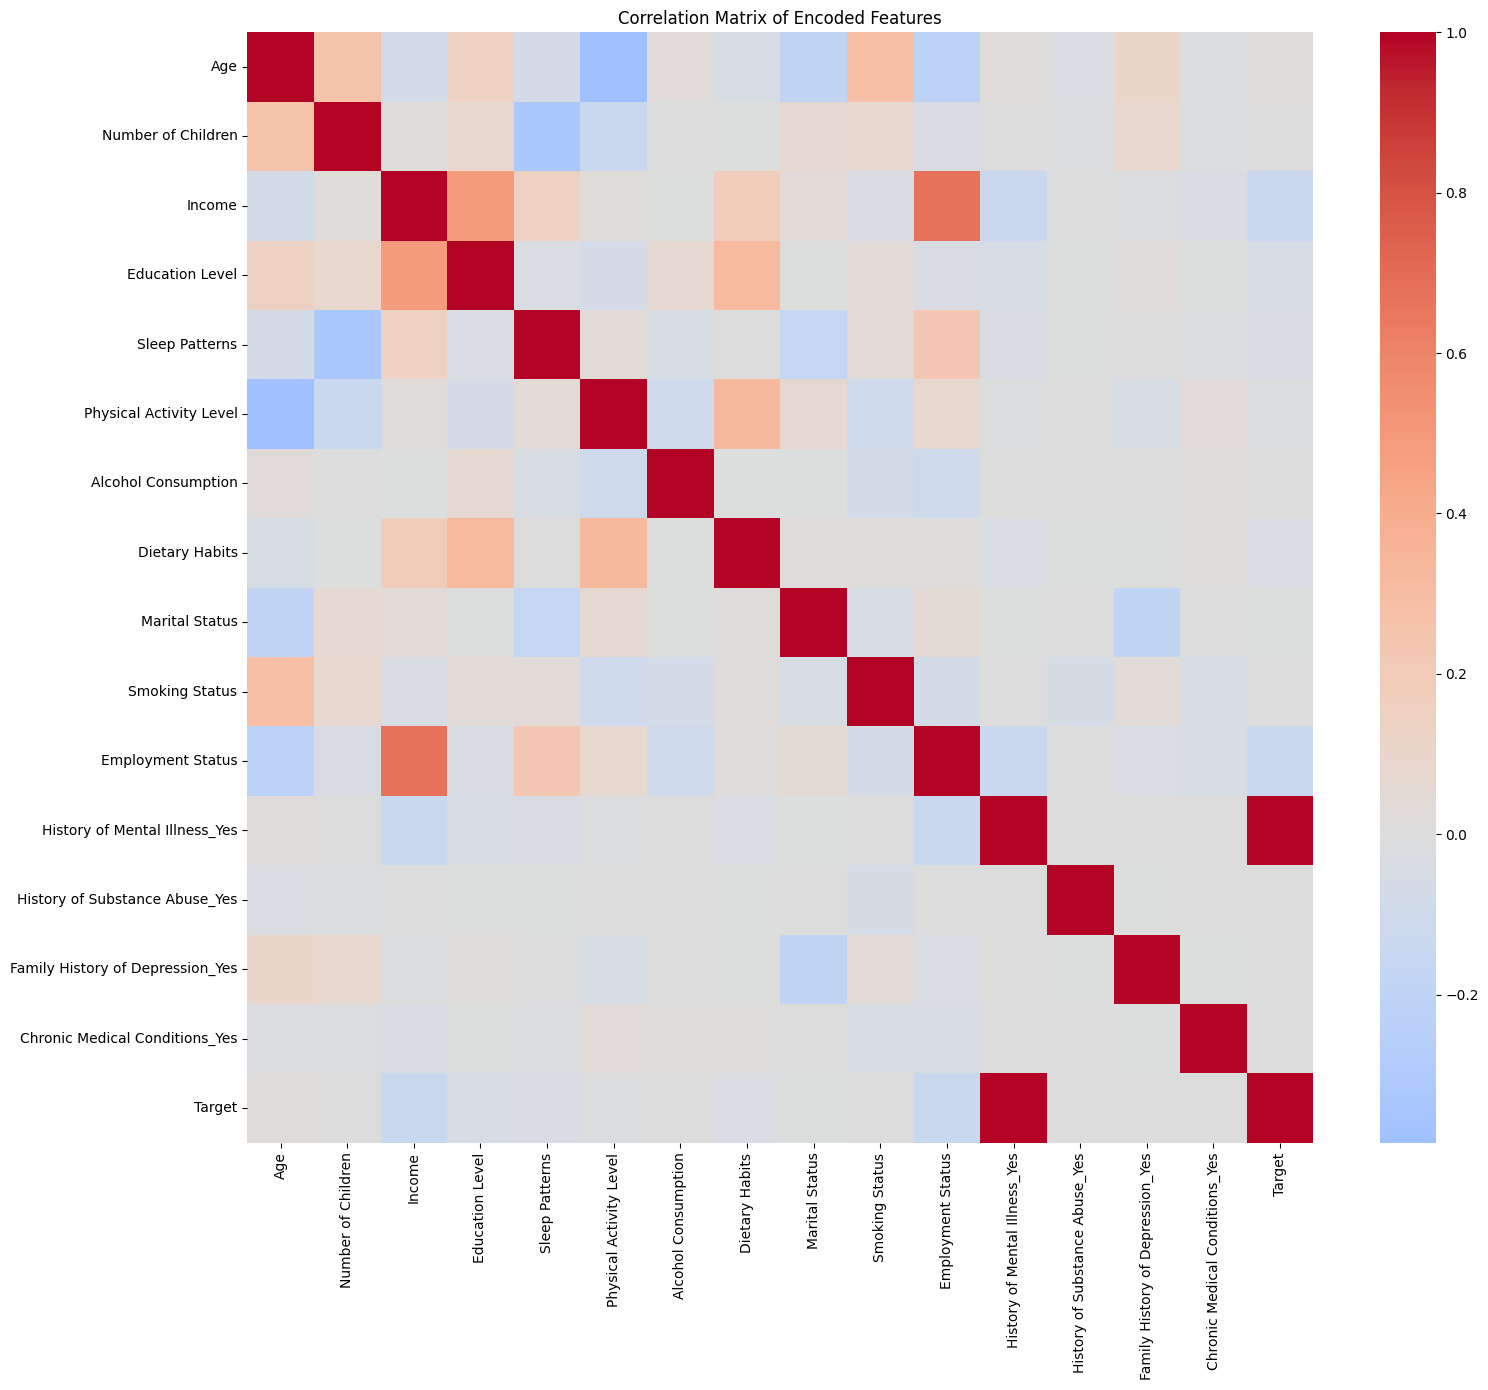


Ordinal Encoding Scheme:
Education Level: ['High School', 'Associate Degree', "Bachelor's Degree", "Master's Degree", 'PhD']
Sleep Patterns: ['Poor', 'Fair', 'Good']
Physical Activity Level: ['Sedentary', 'Moderate', 'Active']
Alcohol Consumption: ['Low', 'Moderate', 'High']
Dietary Habits: ['Unhealthy', 'Moderate', 'Healthy']
Marital Status: ['Widowed', 'Divorced', 'Single', 'Married']
Smoking Status: ['Current', 'Former', 'Non-smoker']
Employment Status: ['Unemployed', 'Employed']
--------------------------------------------------


In [3]:
# -----------------------------------------------------------
# Part 3: Feature Encoding & Correlation Analysis
# -----------------------------------------------------------
print("\n--- Step 3: Feature Encoding & Correlation Analysis ---")
# Define categorical and numerical columns
categorical_cols = ['Marital Status', 'Education Level', 'Smoking Status',
                    'Physical Activity Level', 'Employment Status',
                    'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
                    'History of Mental Illness', 'History of Substance Abuse',
                    'Family History of Depression', 'Chronic Medical Conditions']
numerical_cols = ['Age', 'Number of Children', 'Income']

# Custom encoding mappings for ordinal variables
education_order = ['High School', 'Associate Degree', 'Bachelor\'s Degree', 'Master\'s Degree', 'PhD']
sleep_order = ['Poor', 'Fair', 'Good']
activity_order = ['Sedentary', 'Moderate', 'Active']
alcohol_order = ['Low', 'Moderate', 'High']
diet_order = ['Unhealthy', 'Moderate', 'Healthy']
marital_order = ['Widowed', 'Divorced', 'Single', 'Married']
smoking_order = ['Current', 'Former', 'Non-smoker']
employment_order = ['Unemployed', 'Employed']

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat_ordinal', OrdinalEncoder(categories=[education_order, sleep_order, activity_order, alcohol_order, diet_order, marital_order, smoking_order, employment_order]),
         ['Education Level', 'Sleep Patterns', 'Physical Activity Level', 'Alcohol Consumption', 'Dietary Habits', 'Marital Status', 'Smoking Status', 'Employment Status']),
        ('cat_onehot', OneHotEncoder(drop='first', sparse_output=False),
         ['History of Mental Illness', 'History of Substance Abuse', 'Family History of Depression', 'Chronic Medical Conditions'])
    ],
    remainder='drop'
)

# Apply the preprocessing
X_encoded = preprocessor.fit_transform(df_clean)

# Get feature names after transformation
num_features = numerical_cols
ordinal_features = ['Education Level', 'Sleep Patterns', 'Physical Activity Level', 'Alcohol Consumption', 'Dietary Habits', 'Marital Status', 'Smoking Status', 'Employment Status']
onehot_transformer = preprocessor.named_transformers_['cat_onehot']
onehot_feature_names = onehot_transformer.get_feature_names_out(['History of Mental Illness', 'History of Substance Abuse', 'Family History of Depression', 'Chronic Medical Conditions'])
all_feature_names = num_features + ordinal_features + list(onehot_feature_names)

# Create a DataFrame with the encoded features
df_encoded = pd.DataFrame(X_encoded, columns=all_feature_names)
# Add the target variable
df_encoded['Target'] = df_clean['History of Mental Illness'].map({'Yes': 1, 'No': 0}).values

print("\nEncoded Dataset Shape:", df_encoded.shape)
print("\nFirst 5 rows of encoded dataset:")
print(df_encoded.head())

# Correlation heatmap
plt.figure(figsize=(16, 14))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Encoded Features')
plt.tight_layout()
plt.show()

print("\nOrdinal Encoding Scheme:")
print("="*50)
print(f"Education Level: {education_order}")
print(f"Sleep Patterns: {sleep_order}")
print(f"Physical Activity Level: {activity_order}")
print(f"Alcohol Consumption: {alcohol_order}")
print(f"Dietary Habits: {diet_order}")
print(f"Marital Status: {marital_order}")
print(f"Smoking Status: {smoking_order}")
print(f"Employment Status: {employment_order}")
print("-" * 50)


--- Step 4: Feature Scaling (Standardization) ---
BEFORE scaling statistics:
                 Age  Number of Children         Income
count  408611.000000       408611.000000  408611.000000
mean       48.956036            1.295929   48967.606699
std        18.192314            1.236509   37924.576364
min        18.000000            0.000000       0.410000
25%        33.000000            0.000000   20742.770000
50%        49.000000            1.000000   37011.400000
75%        65.000000            2.000000   74032.860000
max        80.000000            4.000000  160022.000000

AFTER scaling statistics:
                Age  Number of Children        Income
count  4.086110e+05        4.086110e+05  4.086110e+05
mean   1.704231e-16        1.006445e-16 -2.811489e-16
std    1.000001e+00        1.000001e+00  1.000001e+00
min   -1.701602e+00       -1.048056e+00 -1.291175e+00
25%   -8.770768e-01       -1.048056e+00 -7.442370e-01
50%    2.416604e-03       -2.393268e-01 -3.152631e-01
75%    8.8191

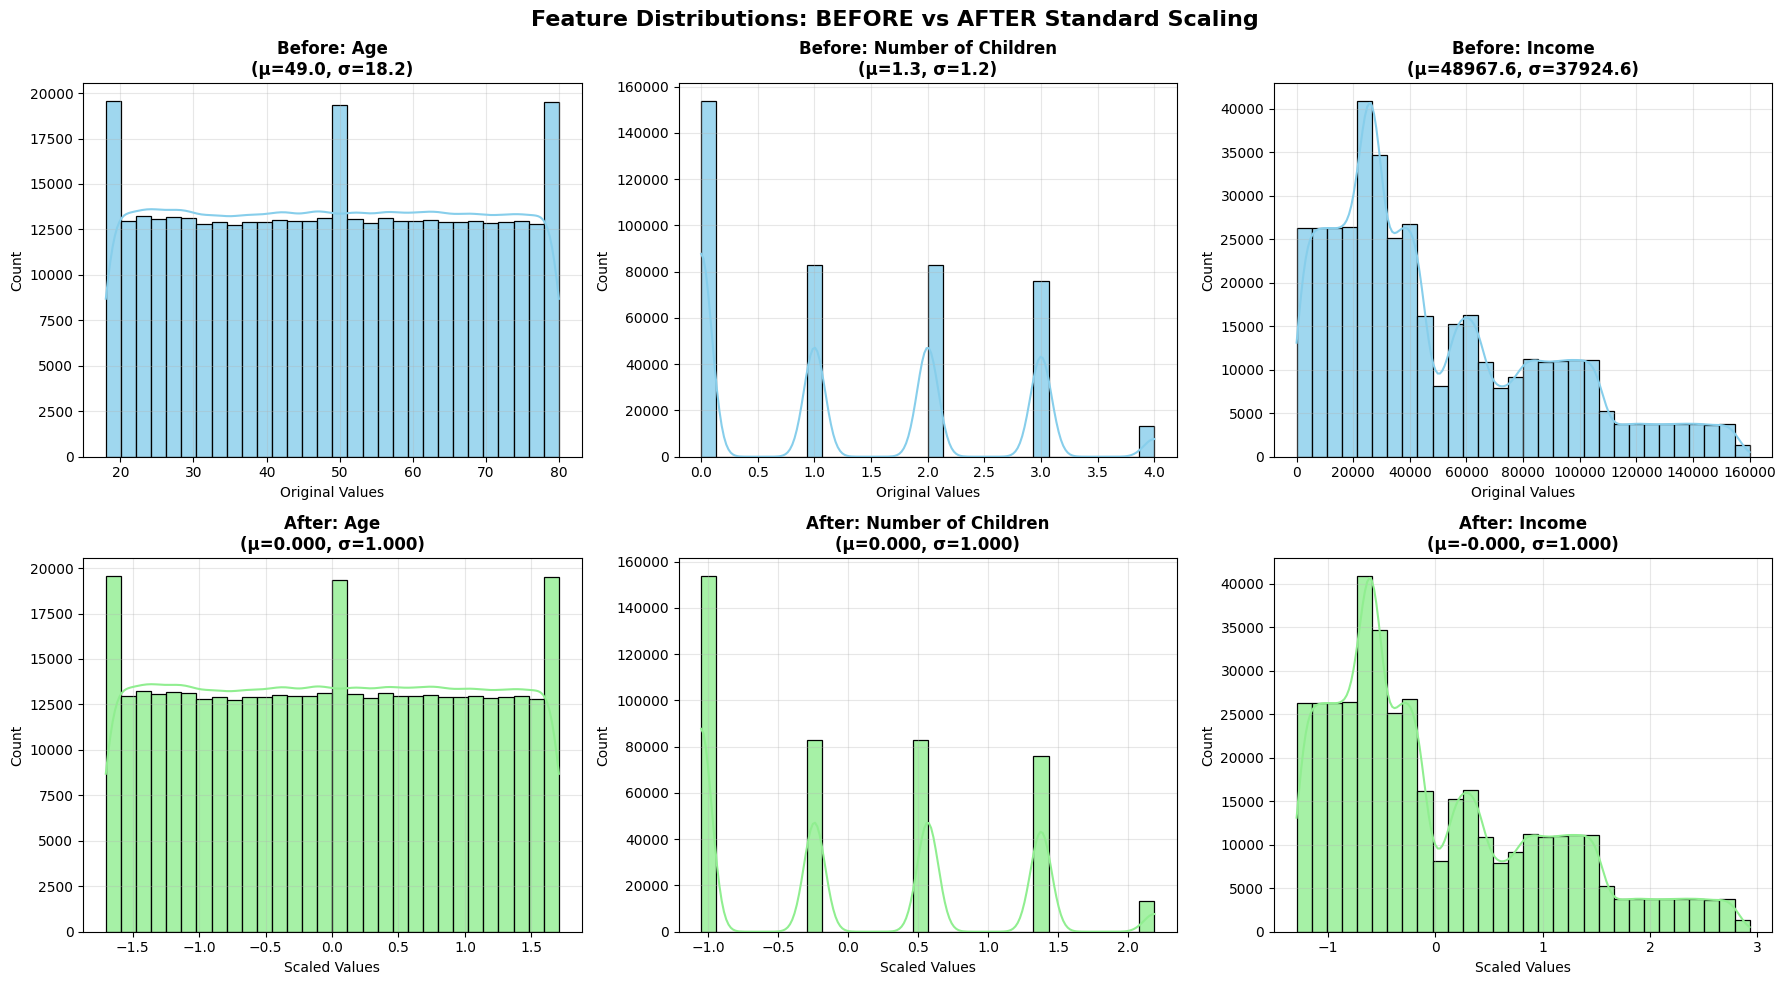

--------------------------------------------------


In [4]:
# -----------------------------------------------------------
# Part 4: Feature Scaling (Standardization)
# -----------------------------------------------------------
print("\n--- Step 4: Feature Scaling (Standardization) ---")
df_scaled = df_encoded.copy()
continuous_cols = ['Age', 'Number of Children', 'Income']

# Scale each continuous column individually
for col in continuous_cols:
    scaler = StandardScaler()
    df_scaled[col] = scaler.fit_transform(df_scaled[[col]]).flatten()

# Verify scaling
print("BEFORE scaling statistics:")
print(df_encoded[continuous_cols].describe())
print("\nAFTER scaling statistics:")
print(df_scaled[continuous_cols].describe())

# Create the comparison visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Before Scaling
for i, col in enumerate(continuous_cols):
    sns.histplot(df_encoded[col], kde=True, ax=axes[0, i], color='skyblue', alpha=0.8, bins=30)
    axes[0, i].set_title(f'Before: {col}\n(μ={df_encoded[col].mean():.1f}, σ={df_encoded[col].std():.1f})', fontweight='bold')
    axes[0, i].set_xlabel('Original Values')
    axes[0, i].grid(True, alpha=0.3)

# After Scaling
for i, col in enumerate(continuous_cols):
    sns.histplot(df_scaled[col], kde=True, ax=axes[1, i], color='lightgreen', alpha=0.8, bins=30)
    axes[1, i].set_title(f'After: {col}\n(μ={df_scaled[col].mean():.3f}, σ={df_scaled[col].std():.3f})', fontweight='bold')
    axes[1, i].set_xlabel('Scaled Values')
    axes[1, i].grid(True, alpha=0.3)

plt.suptitle('Feature Distributions: BEFORE vs AFTER Standard Scaling', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()
print("-" * 50)


--- Step 5: Strategic Class Balancing ---
Original dataset shape: (408611, 16)
Original class distribution:
Target
0    283886
1    124725
Name: count, dtype: int64
Percentage of 1s: 30.52%

Selected 124725 most informative majority samples

Final balanced dataset:
Shape: (249450, 16)
Class distribution:
Target
0    124725
1    124725
Name: count, dtype: int64
Percentage of 1s: 50.00%


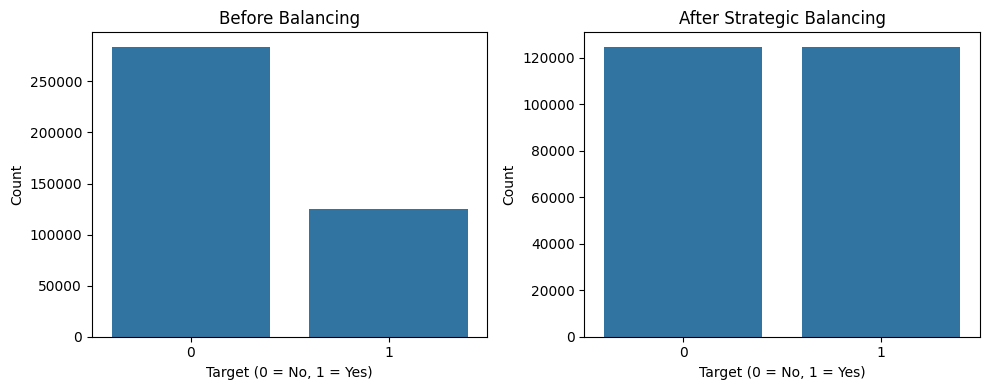

--------------------------------------------------


In [5]:
# -----------------------------------------------------------
# Part 5: Strategic Class Balancing
# -----------------------------------------------------------
print("\n--- Step 5: Strategic Class Balancing ---")
df = df_scaled.copy()
print("Original dataset shape:", df.shape)
print("Original class distribution:")
print(df['Target'].value_counts())
print(f"Percentage of 1s: {df['Target'].mean():.2%}")

# Separate majority and minority classes
df_minority = df[df['Target'] == 1]
df_majority = df[df['Target'] == 0]

# Use feature importance to find most valuable majority class samples
X = df.drop('Target', axis=1)
y = df['Target']
rf = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')
rf.fit(X, y)

X_majority = df_majority.drop('Target', axis=1)
proba_majority = rf.predict_proba(X_majority)
informativeness_scores = 1 - np.max(proba_majority, axis=1)

df_majority_copy = df_majority.copy()
df_majority_copy['informativeness'] = informativeness_scores
df_majority_sorted = df_majority_copy.sort_values('informativeness', ascending=False)
n_samples_needed = len(df_minority)
selected_majority = df_majority_sorted.head(n_samples_needed).drop('informativeness', axis=1)

print(f"\nSelected {len(selected_majority)} most informative majority samples")

# Combine and shuffle
balanced_df = pd.concat([df_minority, selected_majority], ignore_index=True)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nFinal balanced dataset:")
print("Shape:", balanced_df.shape)
print("Class distribution:")
print(balanced_df['Target'].value_counts())
print(f"Percentage of 1s: {balanced_df['Target'].mean():.2%}")

# Visualize the balancing results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Target', data=df)
plt.title('Before Balancing')
plt.xlabel('Target (0 = No, 1 = Yes)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='Target', data=balanced_df)
plt.title('After Strategic Balancing')
plt.xlabel('Target (0 = No, 1 = Yes)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
print("-" * 50)


--- Step 6: Life Factor Index (LFI) Creation & Analysis ---


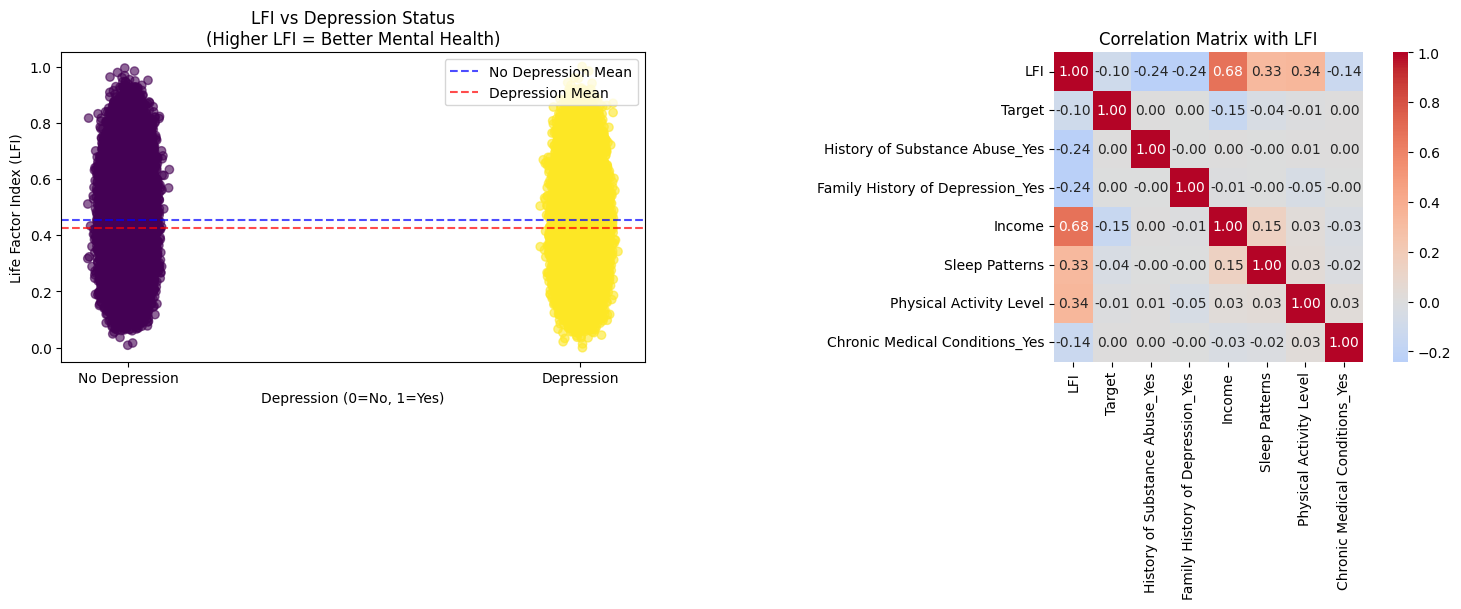

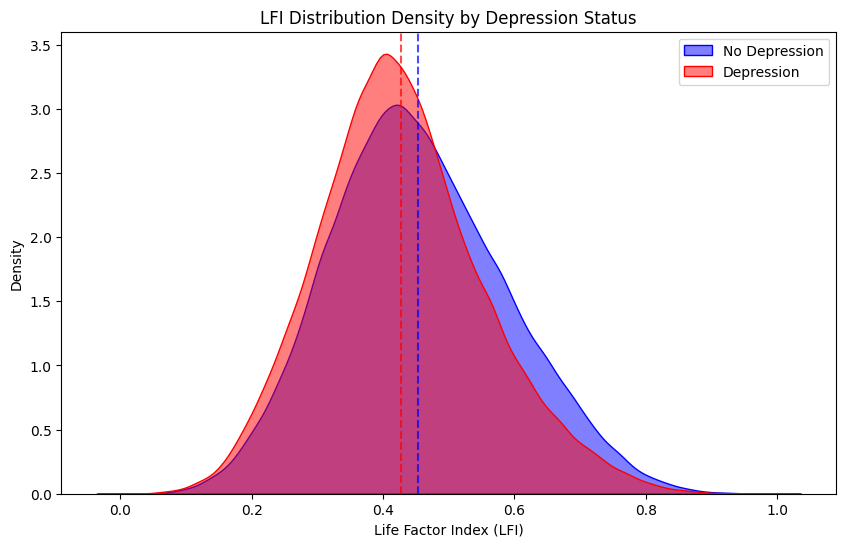

LIFE FACTOR INDEX (LFI) ANALYSIS

LFI Statistics by Depression Status:
            mean       std       min       max
Target                                        
0       0.453633  0.134741  0.008827  0.994664
1       0.426986  0.126636  0.000000  1.000000

LFI Difference: No Depression (0.454) vs Depression (0.427)
Correlation between LFI and Depression: -0.101

Top 5 LFI contributors:
History of Substance Abuse_Yes: 0.180
Family History of Depression_Yes: 0.150
Income: 0.120
Sleep Patterns: 0.110
Marital Status: 0.100

Sample LFI scores:
        LFI  Target
0  0.382024       0
1  0.388857       0
2  0.424602       0
3  0.336091       1
4  0.444943       1
5  0.468411       0
6  0.562948       1
7  0.217818       0
8  0.479068       1
9  0.349596       1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Final preprocessed dataset saved as 'final_preprocessed_dataset.csv'
--------------------------------------------------


In [6]:
# -----------------------------------------------------------
# Part 6: Life Factor Index (LFI) Creation & Analysis
# -----------------------------------------------------------
print("\n--- Step 6: Life Factor Index (LFI) Creation & Analysis ---")
df_final = balanced_df.copy()

# Define comprehensive mental health factors with weights
mental_health_factors = {
    'History of Substance Abuse_Yes': 0.18,
    'Family History of Depression_Yes': 0.15,
    'Income': 0.12,
    'Marital Status': 0.10,
    'Employment Status': 0.09,
    'Sleep Patterns': 0.11,
    'Physical Activity Level': 0.10,
    'Alcohol Consumption': 0.08,
    'Dietary Habits': 0.08,
    'Smoking Status': 0.07,
    'Age': 0.05,
    'Number of Children': 0.04,
    'Chronic Medical Conditions_Yes': 0.09,
    'Education Level': 0.06
}

# Calculate weighted LFI
df_final['LFI'] = 0
for feature, weight in mental_health_factors.items():
    if '_Yes' in feature:
        df_final['LFI'] += (1 - df_final[feature]) * weight
    else:
        df_final['LFI'] += df_final[feature] * weight

# Add important interaction terms
df_final['LFI'] += 0.07 * (df_final['Sleep Patterns'] * df_final['Physical Activity Level'])
df_final['LFI'] += 0.05 * (df_final['Income'] * df_final['Employment Status'])

# Scale final LFI to 0-1 range
df_final['LFI'] = (df_final['LFI'] - df_final['LFI'].min()) / (df_final['LFI'].max() - df_final['LFI'].min())

# EDA Visualizations
plt.figure(figsize=(15, 6))

# 1. SCATTER PLOT
plt.subplot(1, 2, 1)
np.random.seed(42)
jitter = np.random.normal(0, 0.02, size=len(df_final))
scatter = plt.scatter(df_final['Target'] + jitter, df_final['LFI'], alpha=0.6, c=df_final['Target'], cmap='viridis')
plt.title('LFI vs Depression Status\n(Higher LFI = Better Mental Health)')
plt.xlabel('Depression (0=No, 1=Yes)')
plt.ylabel('Life Factor Index (LFI)')
plt.xticks([0, 1], ['No Depression', 'Depression'])
means = df_final.groupby('Target')['LFI'].mean()
plt.axhline(y=means[0], color='blue', linestyle='--', alpha=0.7, label='No Depression Mean')
plt.axhline(y=means[1], color='red', linestyle='--', alpha=0.7, label='Depression Mean')
plt.legend(loc='upper right')

# 2. Correlation heatmap with LFI
plt.subplot(1, 2, 2)
correlation_features = ['LFI', 'Target', 'History of Substance Abuse_Yes', 'Family History of Depression_Yes',
                        'Income', 'Sleep Patterns', 'Physical Activity Level', 'Chronic Medical Conditions_Yes']
correlation_matrix = df_final[correlation_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Correlation Matrix with LFI')
plt.tight_layout()
plt.show()

# Density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_final[df_final['Target'] == 0], x='LFI', color='blue', label='No Depression', fill=True, alpha=0.5)
sns.kdeplot(data=df_final[df_final['Target'] == 1], x='LFI', color='red', label='Depression', fill=True, alpha=0.5)
plt.title('LFI Distribution Density by Depression Status')
plt.xlabel('Life Factor Index (LFI)')
plt.ylabel('Density')
plt.axvline(x=means[0], color='blue', linestyle='--', alpha=0.7)
plt.axvline(x=means[1], color='red', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

# Statistical summary
print("=" * 50)
print("LIFE FACTOR INDEX (LFI) ANALYSIS")
print("=" * 50)
lfi_stats = df_final.groupby('Target')['LFI'].agg(['mean', 'std', 'min', 'max'])
print("\nLFI Statistics by Depression Status:")
print(lfi_stats)
print(f"\nLFI Difference: No Depression ({lfi_stats.loc[0, 'mean']:.3f}) vs Depression ({lfi_stats.loc[1, 'mean']:.3f})")
print(f"Correlation between LFI and Depression: {df_final['LFI'].corr(df_final['Target']):.3f}")
print("\nTop 5 LFI contributors:")
top_contributors = sorted(mental_health_factors.items(), key=lambda x: x[1], reverse=True)[:5]
for feature, weight in top_contributors:
    print(f"{feature}: {weight:.3f}")

print("\nSample LFI scores:")
print(df_final[['LFI', 'Target']].head(10).to_string())

# Save final dataset
df_final.to_csv('final_preprocessed_dataset.csv', index=False)
files.download('final_preprocessed_dataset.csv')
print("\nFinal preprocessed dataset saved as 'final_preprocessed_dataset.csv'")
print("-" * 50)